<a href="https://colab.research.google.com/github/IndraWijaya2/VisiKomputer/blob/main/Jobsheet2PenugasanViskom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [47]:
from google.colab import files
uploaded = files.upload()

Saving 7.jpg to 7.jpg


In [48]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9101


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.8947 - loss: 0.3603 - val_accuracy: 0.9793 - val_loss: 0.0675
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9792 - loss: 0.0675 - val_accuracy: 0.9840 - val_loss: 0.0563
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9872 - loss: 0.0430 - val_accuracy: 0.9860 - val_loss: 0.0532
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9912 - loss: 0.0287 - val_accuracy: 0.9872 - val_loss: 0.0508
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9875 - val_loss: 0.0489


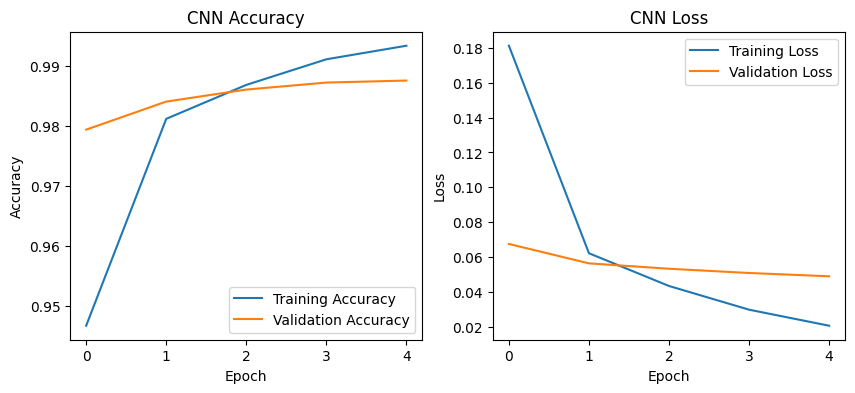

In [41]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# Plot history
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [49]:
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):

    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None]

    return canvas, arr


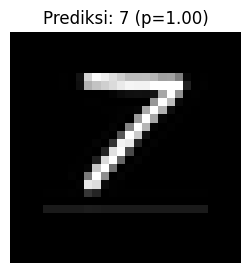

Rekap Prediksi (CNN):
- 7.jpg -> 7 (p=0.996)


In [50]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)

    x_batch = np.expand_dims(x, axis=0)
    probs = model.predict(x_batch, verbose=0)[0]
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")


In [51]:
from sklearn.metrics import accuracy_score

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    _, x = preprocess_to_mnist_28x28(img_pil)
    x_flat = x.reshape(1, -1)

    pred = int(clf.predict(x_flat)[0])

    conf = None
    try:
        if hasattr(clf, "predict_proba"):
            conf = float(np.max(clf.predict_proba(x_flat)))
    except Exception:
        pass

    results.append((fname, pred, conf))

    print(f"{fname} -> Prediksi SVM: {pred}" + (f" (p≈{conf:.2f})" if conf is not None else ""))


7.jpg -> Prediksi SVM: 2
